In [1]:
import imageio

In [2]:
im = imageio.imread('./20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm')

In [3]:
type(im)

imageio.core.util.Array

In [4]:
im

Array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [5]:
im[0, 0]

0

In [6]:
im[0:2, 0:2]

Array([[0, 0],
       [0, 0]], dtype=uint16)

In [7]:
im.meta

Dict([('BitsStored', 16),
      ('ContentDate', '20111229'),
      ('PatientSex', ''),
      ('InstanceNumber', ''),
      ('PatientID', ''),
      ('StudyDate', ''),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.7'),
      ('PixelData',
       b'Data converted to numpy array, raw data removed to preserve memory'),
      ('shape', (4084, 3328)),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.9590.100.1.1.353208385611789106605936574741385682534'),
      ('BitsAllocated', 16),
      ('SeriesNumber', ''),
      ('StudyTime', ''),
      ('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('PixelRepresentation', 0),
      ('Modality', 'OT'),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.9590.100.1.1.134970997511559836809032193482781922275'),
      ('PatientName', ''),
      ('PatientBirthDate', ''),
      ('sampling', (1.0, 1.0)),
      ('Rows', 4084),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.9590.100.1.1.241740140812485214905427915863105056665'),
      ('PatientOrientation', ''),
    

In [8]:
im.meta['Modality']

'OT'

In [9]:
im.meta.keys()

odict_keys(['BitsStored', 'ContentDate', 'PatientSex', 'InstanceNumber', 'PatientID', 'StudyDate', 'SOPClassUID', 'PixelData', 'shape', 'SeriesInstanceUID', 'BitsAllocated', 'SeriesNumber', 'StudyTime', 'TransferSyntaxUID', 'PixelRepresentation', 'Modality', 'StudyInstanceUID', 'PatientName', 'PatientBirthDate', 'sampling', 'Rows', 'SOPInstanceUID', 'PatientOrientation', 'Columns', 'ContentTime', 'SamplesPerPixel', 'HighBit'])

In [10]:
import matplotlib.pyplot as plt

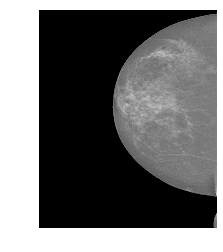

In [13]:
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [14]:
# 多维图像的导入
import imageio
import numpy as np

In [15]:
im = imageio.imread('../92091-1M.jpg')

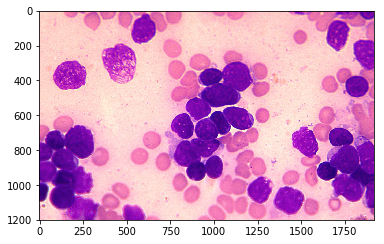

In [20]:
plt.imshow(im)
plt.show()

In [16]:
import scipy.ndimage as ndi

print('data type:', im.dtype)
print('min value:', im.min())
print('max value:', im.max())

data type: uint8
min value: 0
max value: 255


In [17]:
hist = ndi.histogram(im, min=0, max=255, bins=256)

In [18]:
cdf = hist.cumsum() / hist.sum()

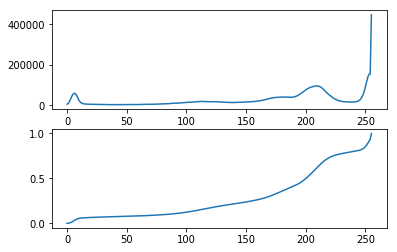

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].plot(hist, label='hist')
axes[1].plot(cdf, label='cumsum')
plt.show()

In [21]:
im_equalized = cdf[im] * 255

In [23]:
im_equalized.shape

(1200, 1920, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


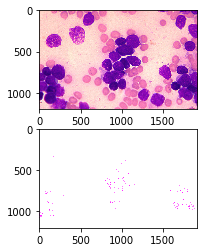

In [22]:
fig, axes = plt.subplots(ncols=1, nrows=2)
axes[0].imshow(im)
axes[1].imshow(im_equalized)
plt.show()

In [24]:
mask = im > 230

In [59]:
wbc = np.where(im < 230, im, 0)

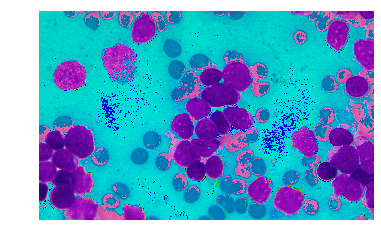

In [60]:
plt.imshow(wbc)
plt.axis('off')
plt.show()

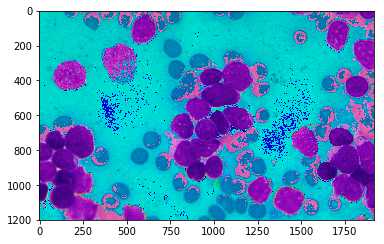

In [62]:
plt.imshow(wbc)
plt.show()

In [1]:
# 论文实验

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi

In [99]:
im = imageio.imread('../92091-1M.jpg')

In [100]:
from skimage import color

In [101]:
hsv_im = color.rgb2hsv(im)

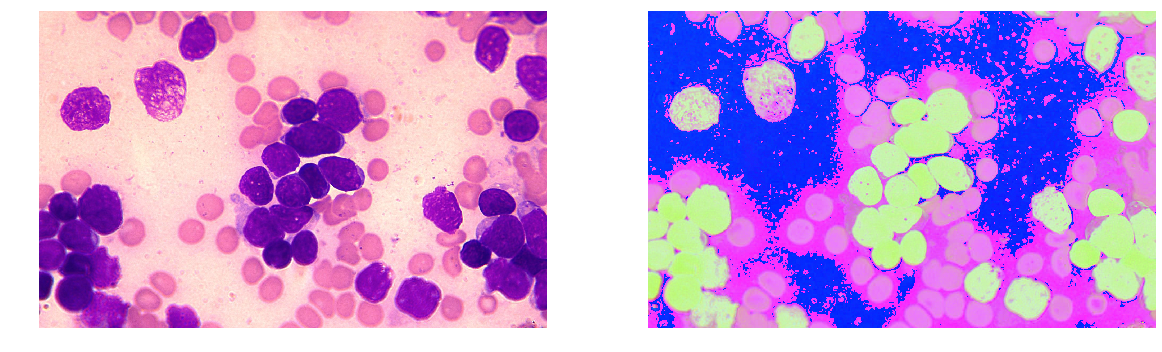

In [102]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 20))
axes[0].imshow(im)
axes[1].imshow(hsv_im)
axes[0].axis('off')
axes[1].axis('off')
plt.show()

In [103]:
hsv_im.shape

(1200, 1920, 3)

In [104]:
h_im = hsv_im[:, :, 0]
s_im = hsv_im[:, :, 1]
v_im = hsv_im[:, :, 2]

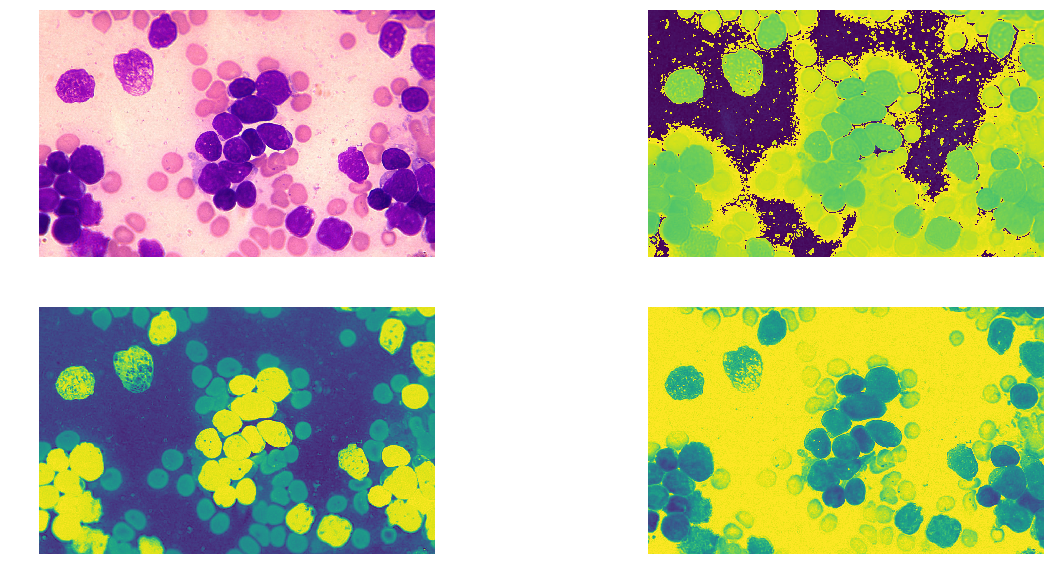

In [105]:
fig, axe = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True)
axe[0, 0].imshow(im)
axe[0, 1].imshow(h_im)
axe[1, 0].imshow(s_im)
axe[1, 1].imshow(v_im)
for i in range(2):
    for j in range(2):
        axe[i, j].axis('off')
plt.show()

In [106]:
print('s_im data type:', s_im.dtype)
print('s_im min value:', s_im.min())
print('s_im max value:', s_im.max())

s_im data type: float64
s_im min value: 0.0
s_im max value: 1.0


In [107]:
from skimage import img_as_ubyte

In [108]:
s_im_int = img_as_ubyte(s_im)

/home/caolei/.local/lib/python3.5/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


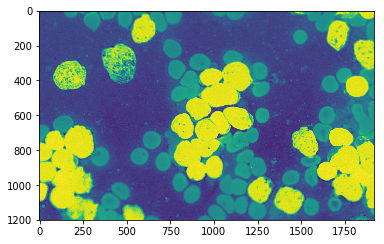

In [109]:
plt.imshow(s_im_int)
plt.show()

In [110]:
print('s_im_int data type:', s_im_int.dtype)
print('s_im_int min value:', s_im_int.min())
print('s_im_int max value:', s_im_int.max())

s_im_int data type: uint8
s_im_int min value: 0
s_im_int max value: 255


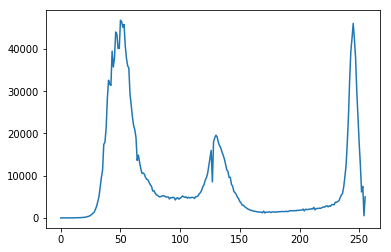

In [111]:
hist = ndi.histogram(s_im_int, min=0, max=255, bins=256)
plt.plot(hist)
plt.show()

In [34]:
from skimage import io, color, filters, data, segmentation, measure, morphology
from skimage.morphology import disk
import matplotlib.patches as mpatches

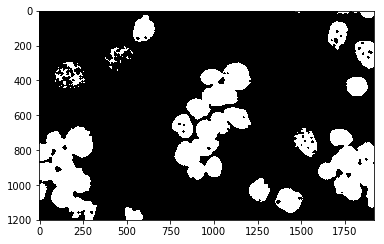

In [123]:
mask1 = np.where(s_im_int > 200, 1, 0)
# mask1=morphology.dilation(mask1, disk(4))
# mask1=morphology.erosion(mask1, disk(6))
for i in range(2):
    mask1=morphology.dilation(mask1, disk(2))
    mask1=morphology.erosion(mask1, disk(4))
plt.imshow(mask1, cmap='gray')
plt.show()

In [124]:
cleared = mask1.copy()  #复制
segmentation.clear_border(cleared)  #清除与边界相连的目标物

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [125]:
cleared=morphology.remove_small_objects(cleared,min_size=200,connectivity=1)

/home/caolei/.local/lib/python3.5/site-packages/skimage/morphology/misc.py:127: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


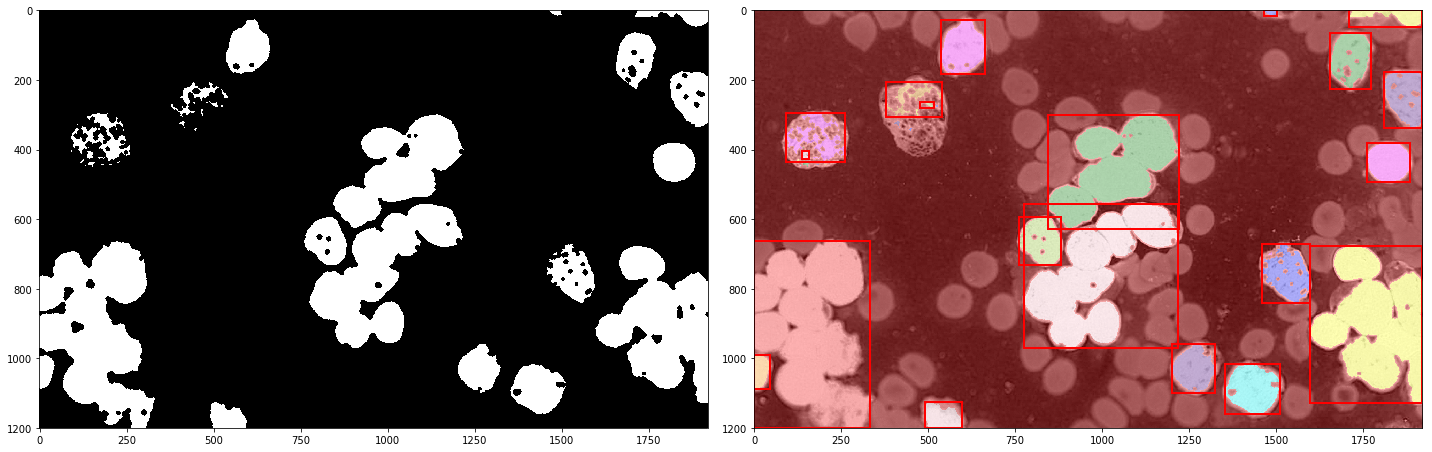

In [126]:
label_image =measure.label(cleared)  #连通区域标记
borders = np.logical_xor(mask1, cleared) #异或
label_image[borders] = -1
image_label_overlay =color.label2rgb(label_image, image=s_im) #不同标记用不同颜色显示

fig,(ax0,ax1)= plt.subplots(1,2, figsize=(20, 20))
ax0.imshow(cleared,plt.cm.gray)
ax1.imshow(image_label_overlay)
for region in measure.regionprops(label_image): #循环得到每一个连通区域属性集

    #忽略小区域
    if region.area < 200:
        continue

    #绘制外包矩形
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax1.add_patch(rect)
fig.tight_layout()
plt.show()

In [127]:
tmp = np.stack([mask1] * 3, axis=-1) * im

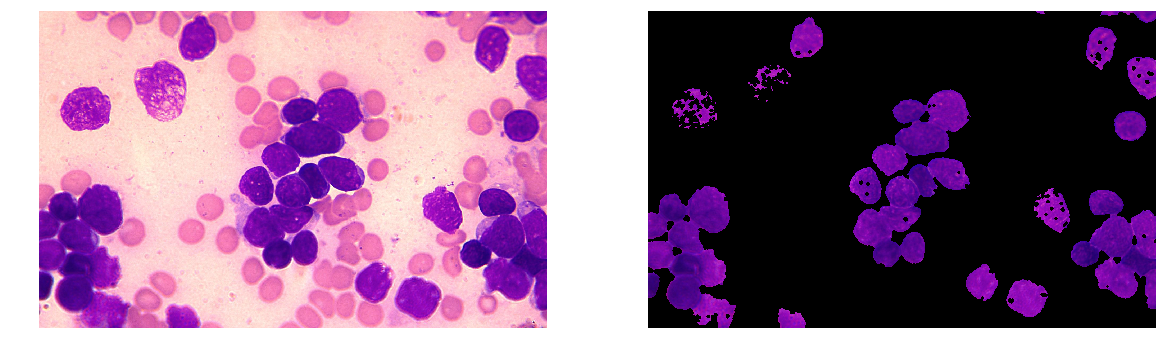

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
axes[0].imshow(im)
axes[1].imshow(tmp)
axes[0].axis('off')
axes[1].axis('off')
plt.show()

In [86]:
# k-means方法

In [90]:
import numpy as np                #插入numpy库
import PIL.Image as image         #加载pil的包
from sklearn.cluster import KMeans
 
def loadData(filePath):
    f = open(filePath,'rb')       #以二进制读取文件
    data = []
    img = image.open(f)           #返回图片的像素值
    m,n = img.size                #返回图片的大小
    for i in range(m):
        for j in range(n):
            x,y,z = img.getpixel((i,j))
            data.append([x/256.0,y/256.0,z/256.0])
    f.close()
    return np.mat(data),m,n
 
imgData,row,col = loadData('../92091-1M.jpg')
label = KMeans(n_clusters=2).fit_predict(imgData)  #图片聚成4类
 
label = label.reshape([row,col])
pic_new = image.new("L", (row, col))
for i in range(row):                          #根据所属类别给图片添加灰度
    for j in range(col):
        pic_new.putpixel((i,j), int(256/(label[i][j]+1)))

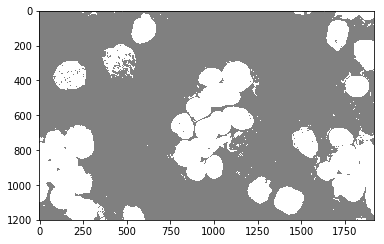

In [91]:
plt.imshow(pic_new)
plt.show()

In [94]:
pic = np.array(pic_new)

In [95]:
pic.shape

(1200, 1920)

In [112]:
cleared = pic.copy()  #复制
segmentation.clear_border(cleared)  #清除与边界相连的目标物

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [113]:
cleared=morphology.remove_small_objects(cleared,min_size=200,connectivity=1)

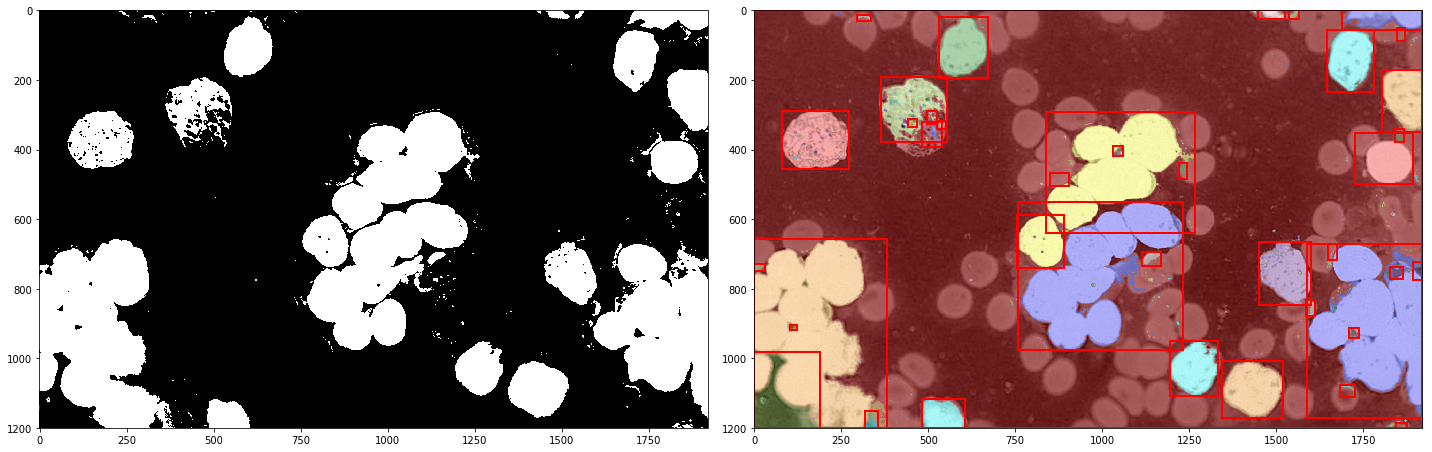

In [114]:
label_image =measure.label(cleared)  #连通区域标记
borders = np.logical_xor(pic, cleared) #异或
label_image[borders] = -1
image_label_overlay =color.label2rgb(label_image, image=s_im) #不同标记用不同颜色显示

fig,(ax0,ax1)= plt.subplots(1,2, figsize=(20, 20))
ax0.imshow(cleared,plt.cm.gray)
ax1.imshow(image_label_overlay)
for region in measure.regionprops(label_image): #循环得到每一个连通区域属性集

    #忽略小区域
    if region.area < 200:
        continue

    #绘制外包矩形
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax1.add_patch(rect)
fig.tight_layout()
plt.show()